# Time series clustering exercise

# Data

The data is on the github repo. It can also be gotten directly from the Census Boureau and from NYC open data.

Each file is the economic census for 1 year.
Download it programmatically and move it to PUIdata

data link https://github.com/fedhere/MLTSA_FBianco/blob/main/data/nyc_zpb_est_1994_2014.csv



make sure yuo read it so that the index column is the zipcode

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gp
from sklearn.cluster import KMeans
import missingno as mno
from sklearn.impute import KNNImputer
from sklearn.preprocessing import StandardScaler

In [2]:
# read in the business data: this is the number of licenced business per zipcode in NYC from 1994 through 2014
df = pd.read_csv("https://raw.githubusercontent.com/fedhere/MLTSA_FBianco/refs/heads/main/data/nyc_zpb_est_1994_2014.csv",index_col=0)
df.head()

,1994,1995,1996,1997,1998,1999,2000,2001,2002,2003,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014
11436,51.0,50.0,53.0,51.0,51.0,58.0,65.0,57.0,78.0,74.0,...,82.0,80.0,84.0,90.0,92.0,98.0,101.0,57.0,99.0,109.0
11213,406.0,420.0,433.0,456.0,476.0,473.0,477.0,493.0,546.0,569.0,...,556.0,565.0,556.0,592.0,621.0,675.0,674.0,493.0,755.0,772.0
11212,505.0,494.0,502.0,527.0,519.0,541.0,520.0,527.0,577.0,581.0,...,587.0,570.0,587.0,602.0,647.0,699.0,713.0,527.0,731.0,752.0
11225,381.0,387.0,388.0,410.0,416.0,409.0,417.0,422.0,479.0,488.0,...,491.0,499.0,514.0,520.0,543.0,580.0,597.0,422.0,673.0,696.0
11218,985.0,1015.0,1049.0,1075.0,1118.0,1149.0,1161.0,1180.0,1228.0,1247.0,...,1332.0,1331.0,1377.0,1397.0,1457.0,1474.0,1523.0,1180.0,1687.0,1736.0


# Data cleaning

you may need to clean your data: for some NYC zip codes there may be no info
sanity check. you should have 21(N_timestamps) datapoints per time series and about 239 zipcodes (Nzipcodes)

- drop all rows with 10 missing values or more
- impute missing values using k nearest neighbors with k=5 (you can use AI prompts to do that)


mydata.shape should be (Nzipcodes, Ntimestamps)



In [3]:
df.shape

(248, 21)

<Axes: >

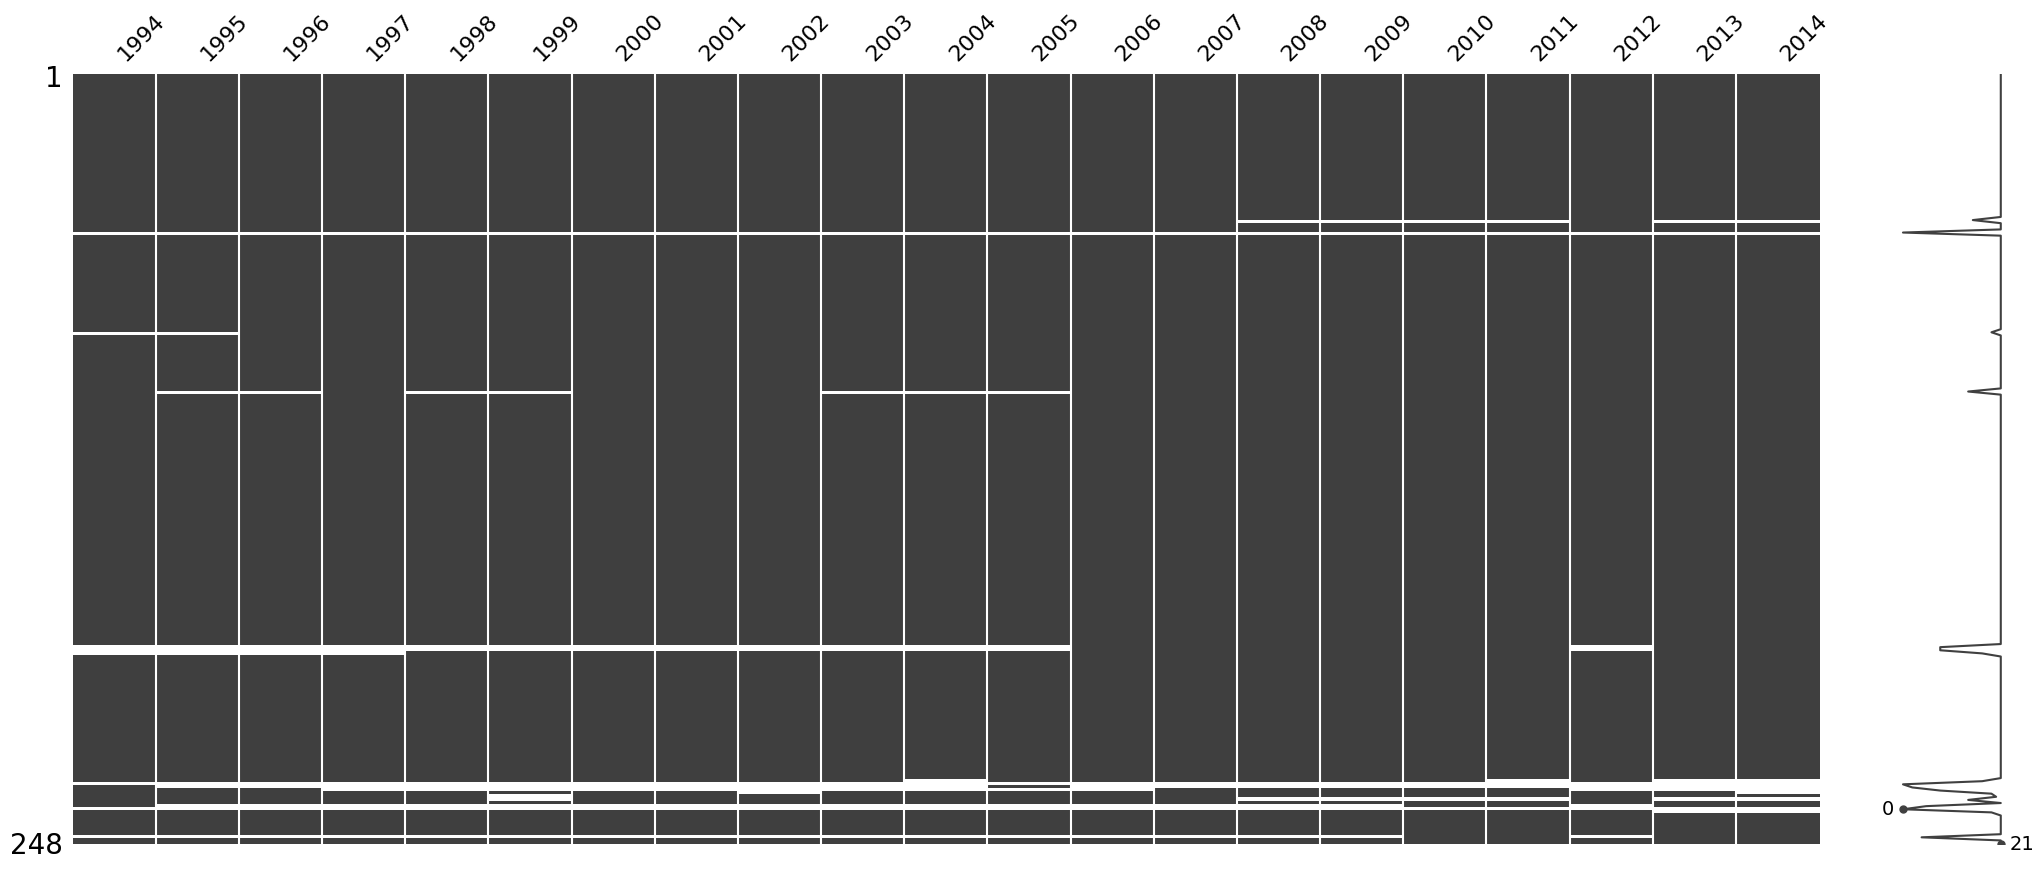

In [4]:
mno.matrix(df)

### **Figure 1:** 
The mno matrix of the NYC businesses per zipcode as a function of time, with a frequency graph on the right-hand side of the figure. The matrix helps to visualize if there are any NaN values in the dataframe, with the frequency graph showing when the NaN values show up and with how many show up as well. The white horizontal lines in the mno matrix show where these NaN values lie. Approaching rows ~200-248, a chunk of data is seen to be NaN values, with this also corresponding in the frequency graph on the right as well. A chunk of NaN values from ~1994 - 2005 is also seen in the data, around row ~190. 

In [5]:
df.dropna(thresh=10,inplace=True)
df.shape

(239, 21)

<Axes: >

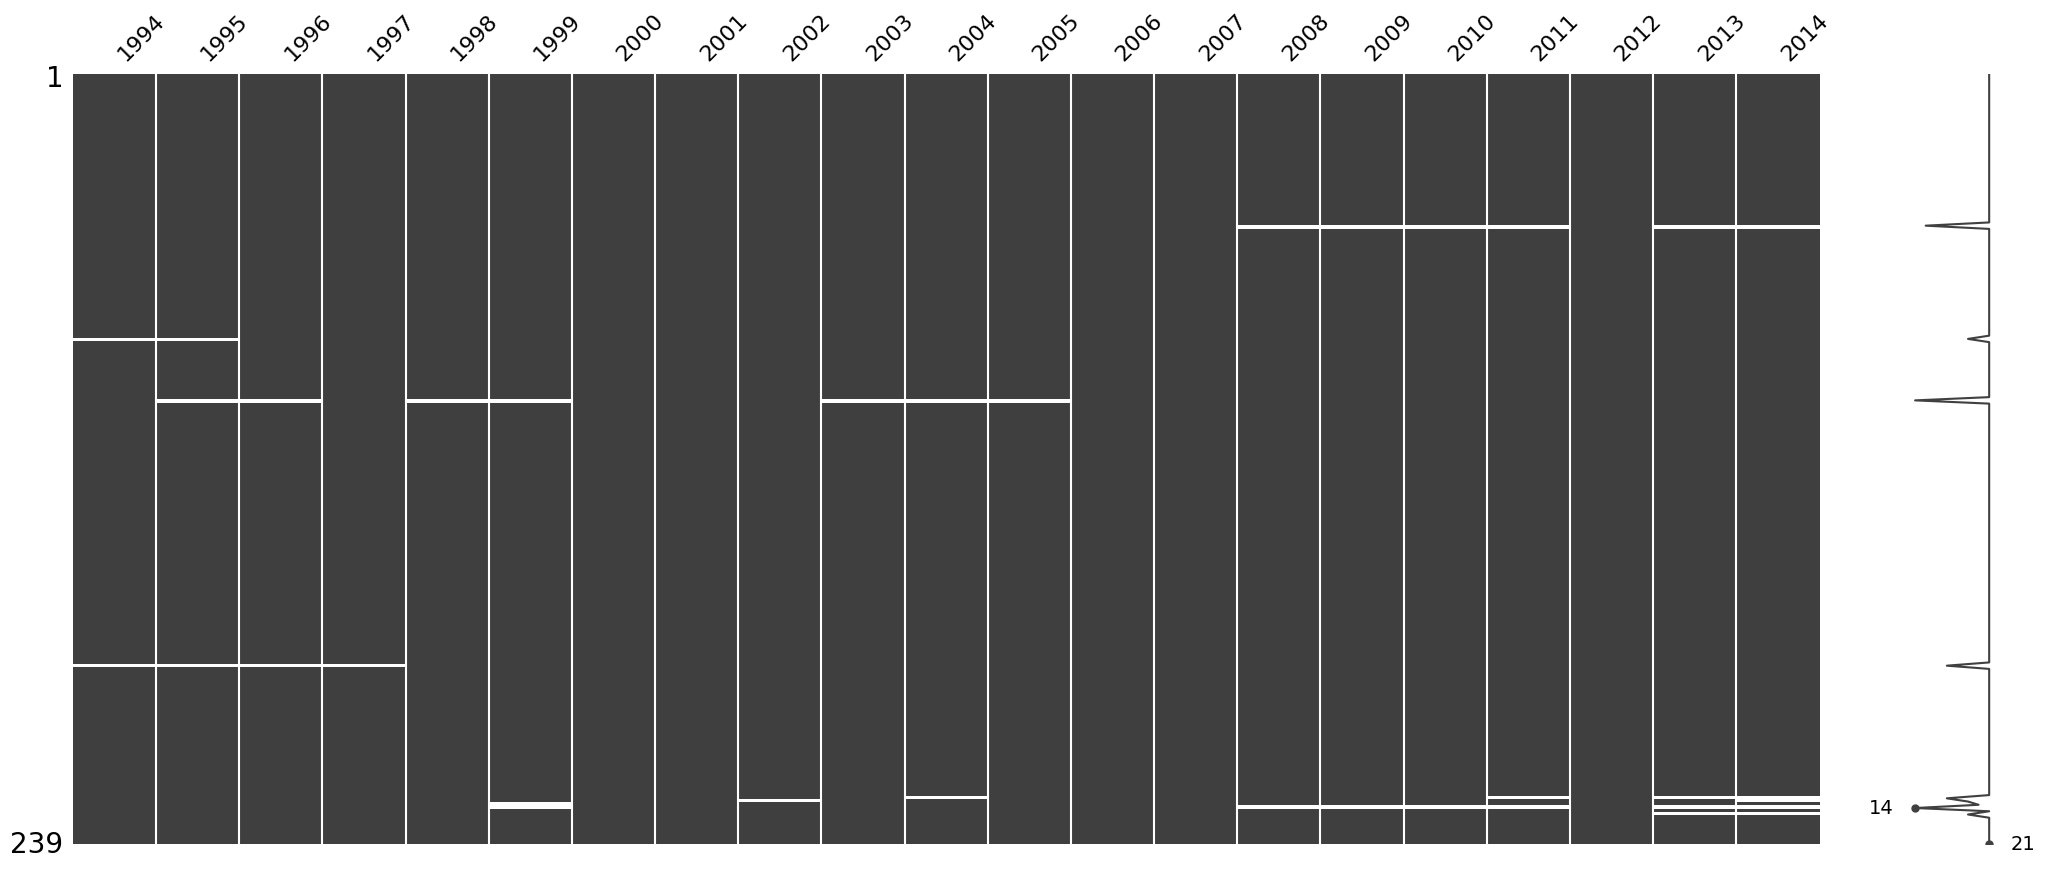

In [6]:
mno.matrix(df)

### **Figure 2:** 
The mno matrix of the NYC businesses per zipcode as a function of time, with a frequency graph on the right-hand side of the figure, after dropping rows with 10 missing values or more. Compared to Figure 1, we can see the number of rows now drop down to 239 (compared to 248 from before). From the frequency graph on the right, it is indeed seen that the number of NaN values have decreased and also at a lower frequency. However, from the white horizontal lines still seen in the mno matrix, some NaN values still remain depsite removing rows that have more than 10 NaN values. 

In [7]:
# prompt: impute missing values with knearest neighbors

# Initialize KNN imputer with k=5
imputer = KNNImputer(n_neighbors=5)
# Fit and transform the data to impute missing values
df_imputed = pd.DataFrame(imputer.fit_transform(df), columns = df.columns, index=df.index)

In [8]:
df_imputed.shape

(239, 21)

<Axes: >

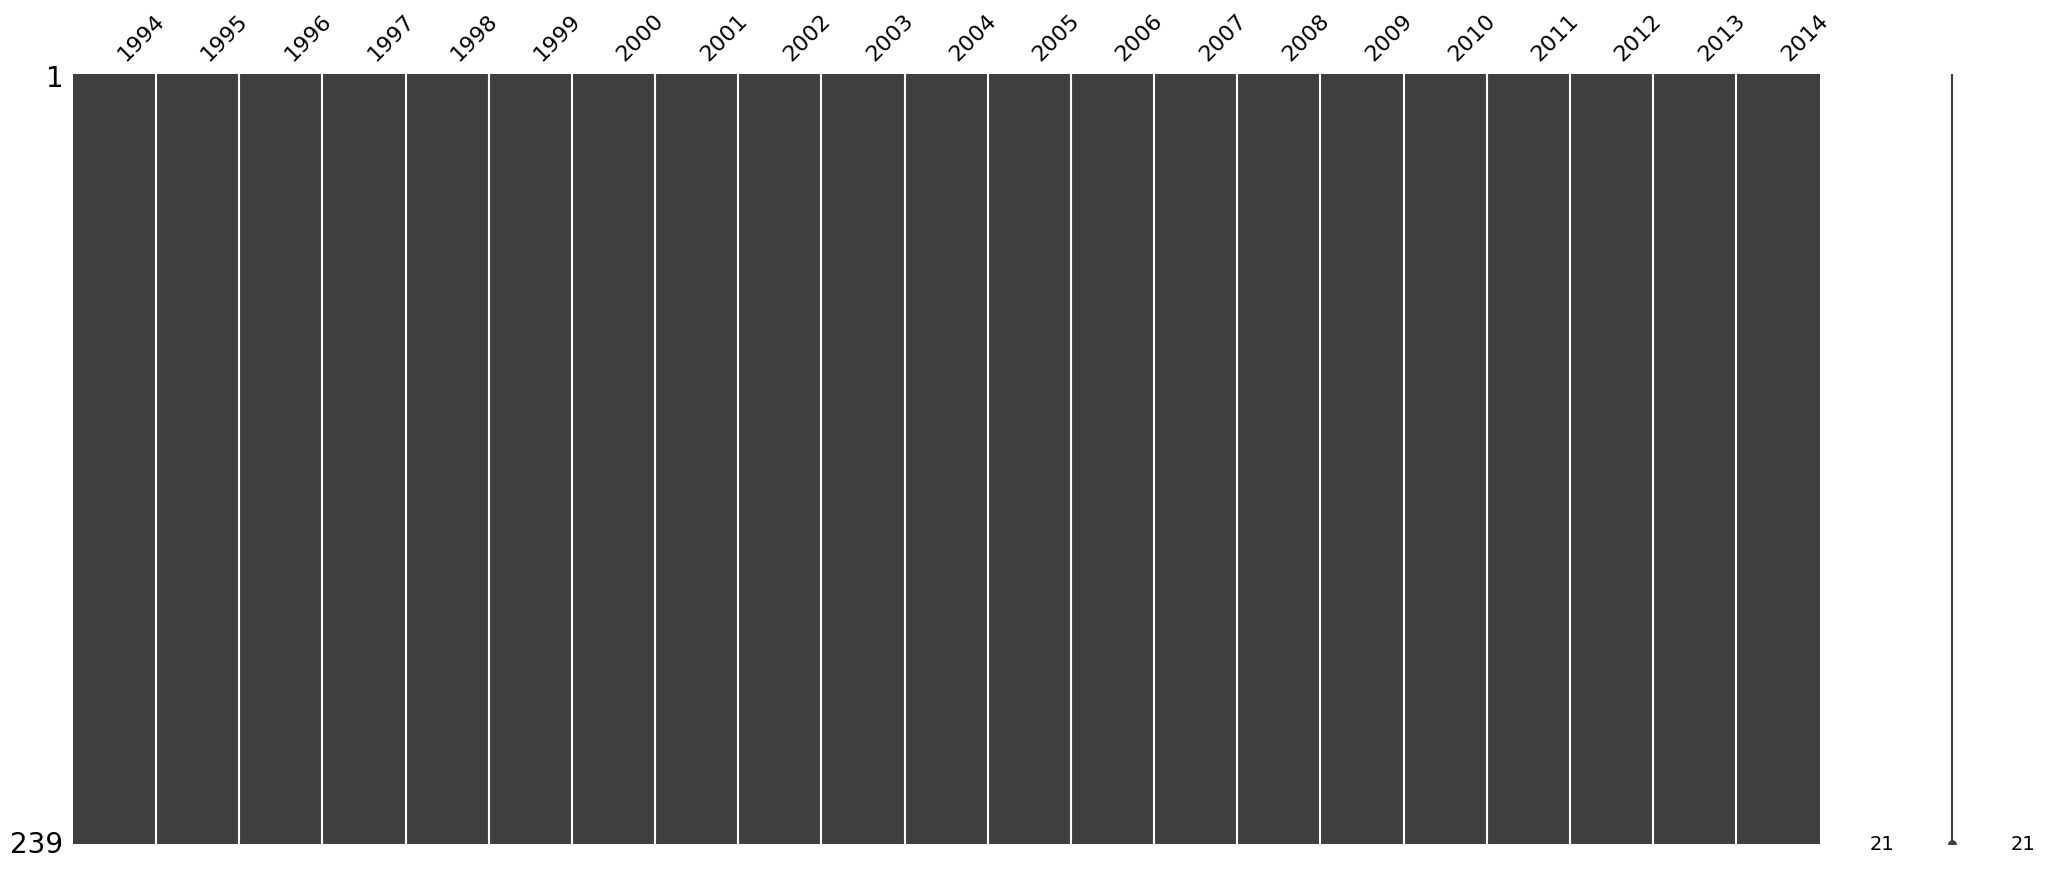

In [9]:
mno.matrix(df_imputed)

### **Figure 3:** 
The mno matrix of the NYC businesses per zipcode as a function of time, with a frequency graph on the right-hand side of the figure, after dropping rows with 10 missing values or more and then imputing the data using k nearest neighbors with k = 5. The number of rows remain the same as Figure 2, as no rows were dropped for imputing the data. Compared to Figure 1, no more white horizontal lines are seen in the mno matrix. The frequency graph on the right-hand side helps demonstrate the lack of NaN values in the matrix as well, where the frequency graph now shows no row in the matrix having NaN values. From the criteria specified, the data has now been cleaned properly and is ready to use for further analysis. 

# get the zipcodes shape file
by cloning the repo https://github.com/wimlds/smart_cities.git


In [10]:
!git clone 'https://github.com/wimlds/smart_cities.git'

Cloning into 'smart_cities'...
remote: Enumerating objects: 156, done.
remote: Total 156 (delta 0), reused 0 (delta 0), pack-reused 156 (from 1)
Receiving objects: 100% (156/156), 15.70 MiB | 28.76 MiB/s, done.
Resolving deltas: 100% (54/54), done.


original data (263, 13)
after cleaning (248, 13)
ZIPCODES: 248 POLYGONS: 248 the difference is due to island with same zip as parts of land, but disjoint shapes
number of NYC zip codes: 248


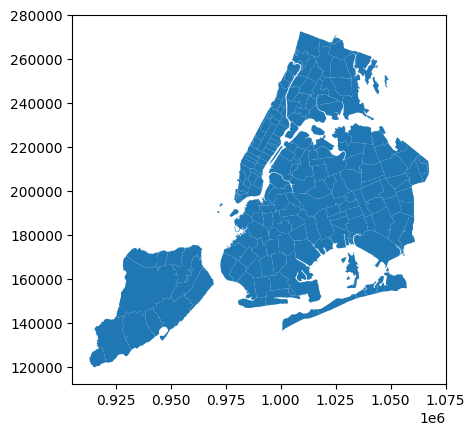

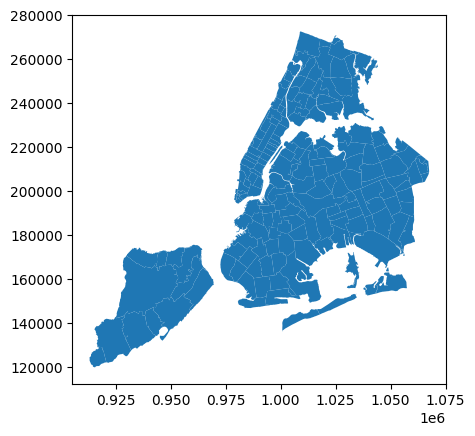

In [11]:
#look at the code and the plots below : I am using geopandas to plot maps of zipcodes from a shapefile and I am removing duplicate entries that have the same zipcode

nyczipsshp = gp.read_file( "smart_cities/NYC_shapefiles/ZIP_CODE_040114.zip")
print("original data", nyczipsshp.shape)
nyczipsshp.plot()

nyczipsshp = nyczipsshp.drop_duplicates("ZIPCODE")
print("after cleaning", nyczipsshp.shape)
nyczipsshp.plot()

print("ZIPCODES:",
      len(np.unique(nyczipsshp.ZIPCODE)), "POLYGONS:",
      len(nyczipsshp.ZIPCODE),
      "the difference is due to island with same zip as parts of land,",
      "but disjoint shapes")
nyczips = nyczipsshp.ZIPCODE.values.astype(int)
print("number of NYC zip codes:", len(nyczips))

### **Figure 4:** 
The counties in NYC that correspond to the zip codes we are looking at in our zipcode data. Note that the values on the x and y axes do not correspond to real-life distances, and this map is plotted mainly for visualization. The top map plot shows all the available zip code data from the downloaded zipcode data file. The bottom map plot shows the same map after removing duplicate entries (i.e. locations) that have the same zipcode. A reduction in the number of counties is seen in the bottom map plot as a result, where small islands off the coast of the bigger land mass have now been visually removed as they have the same zip codes as other larger counties. 

## TASKS:
    
    1. Scale and prep your data.
    2. cluster the NUMBER OF ESTABLISHMENTS time series with K-means
    in **a few** clusters (as discussed there is no real good, sound way to
    decide what a good number is here. try a few options, keeping in mind
    a few is more than a couple, but i recommand you stay within the
    single digit numbers)
    
    3. plot the cluster centers (if you used K means those are the means of
    the clusters). you can plot for example the cluster centers overlayed on
    each time series (using the alpha channel to control the opacity in the
    plot may be helpful here).
    
    4. Use another clustering algorithm (of your choice)
    
    5. overlay your data on a NYC map: you can use shapefiles for the
    zip codes and different colors for different clusters
    
    6. Compare the results of the 2 algorithms
    
    7. attempt an interpretation. this is dangerous ground: clustering is
    an exploratory tool so you do not want to jump to conclusions because
    you see some clusters! but seeing structure in your data can inform
    your next moves as an investigator.
    

Note on preprocessing: the preparation of these data should include the "standardization" of the time seris.
*Always when you apply a moachine learning model you should standardize the data or whiten it.*
These operations may be complicated preprocessing operation, they can for example invoke PCA, and they are aimed at removing covariance in the feature space.

The simplest version of whitening *standardizes each feature*" from every column (feature) you subtract the mean and you divide it by the standard deviation.

But the time series preprocessing is different if you want to use each time stamp as feature: because you want to maintain the coherence of the data, i.e. you **do not want** to treat each feature as an independent feature! the pattenrs in the time series are what you are clustering on (time series goes up and down, creating a pattern) and those patterns would be lost by whitening.

*So when you cluster or otherwise use a time series in a model, using each timestamp as a feature, you want to standardize the observations, not the features.*

**From each row of your table (observation, in this case each zipcode) subtract the mean and you divide the row by the standard deviation.**

In [12]:
scaler = StandardScaler()

data_t = df_imputed.transpose()
scaled_data_t = scaler.fit_transform(data_t)
vals = scaled_data_t.transpose()
scaler.mean_

array([7.44761905e+01, 5.51333333e+02, 5.85428571e+02, 4.86857143e+02,
       1.28552381e+03, 1.01100000e+03, 2.23095238e+03, 8.65809524e+02,
       1.82409524e+03, 1.68838095e+03, 3.91333333e+02, 2.85238095e+02,
       5.86476190e+02, 9.87095238e+02, 9.85095238e+02, 3.16714286e+02,
       1.48619048e+02, 5.98476190e+02, 7.24142857e+02, 9.92142857e+02,
       5.26333333e+02, 9.15285714e+02, 9.77476190e+02, 5.03285714e+02,
       5.45523810e+02, 4.57238095e+02, 1.17271429e+03, 6.72523810e+02,
       4.37571429e+02, 6.86571429e+02, 5.92142857e+02, 4.82428571e+02,
       4.64285714e+02, 5.70047619e+02, 1.31571429e+02, 4.94619048e+02,
       7.25952381e+02, 3.21952381e+02, 2.10952381e+02, 8.24095238e+02,
       6.05238095e+02, 5.83000000e+02, 1.64571429e+02, 1.92561905e+03,
       5.33047619e+02, 2.71714286e+02, 4.68285714e+02, 5.87133333e+02,
       1.85004762e+03, 8.72238095e+02, 7.96285714e+02, 6.25190476e+02,
       6.38095238e+00, 3.50285714e+02, 8.38619048e+02, 1.63909524e+03,
      

In [13]:
vals.shape
vals.mean(axis=1), vals.mean(axis=1).shape

(array([-2.85485921e-16, -3.38353684e-16, -2.11471052e-16,  3.38353684e-16,
        -4.86383420e-16, -2.11471052e-17,  6.66133815e-16, -4.75809868e-16,
         1.16309079e-16,  4.01794999e-16,  8.24737104e-16, -3.38353684e-16,
        -3.17206578e-16,  3.38353684e-16,  4.86383420e-16, -2.32618158e-16,
        -2.85485921e-16, -7.40148683e-17,  5.07530526e-16,  7.61295788e-16,
        -8.88178420e-16, -8.56457762e-16, -1.05735526e-16,  2.11471052e-16,
         1.48029737e-16, -6.34413157e-17, -1.20538500e-15,  8.45884209e-17,
         2.53765263e-16,  2.43191710e-16,  3.91221447e-16, -1.79750394e-16,
         2.11471052e-16,  1.16309079e-16, -3.27780131e-16,  6.34413157e-16,
        -2.32618158e-16, -4.01794999e-16, -4.01794999e-16,  2.74912368e-16,
         9.72766841e-16,  9.51619735e-17, -4.22942105e-16, -9.04038749e-16,
         2.32618158e-16, -6.34413157e-17,  1.05735526e-16,  8.98751972e-17,
         3.17206578e-17,  9.72766841e-16, -3.48927236e-16,  5.18104078e-16,
        -1.7

In [14]:
vals.std(axis=1)

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1.

vals.mean(axis=1) should return 0 (or something very small) everywhere [done]

vals.mean(axis=1).shape should be (248,) (Note from Skyler, not sure about this. After removing some data, seems like our set is 239)

vals.std(axis=1) should return 1 everywhere [done]



# KM Clustering

create a kmeans model with 5 clusters

In [15]:
nc = 5
km = KMeans(n_clusters=nc, random_state=302).fit(vals)


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


### Plot and map the clusters.

First reflect on this: the center of a cluster is a point within the cluster. If your cluster is a cluster of time series its center is... A TIME SERIES! so your cluster centers should be time series of 21 points (1995-2015)

The cluster centers are extracted as km.center

In [16]:
km.cluster_centers_.shape

(5, 21)

In [17]:
# testing output of km.cluster_centers_

In [18]:
# testing output of km.cluster_centers_[1]

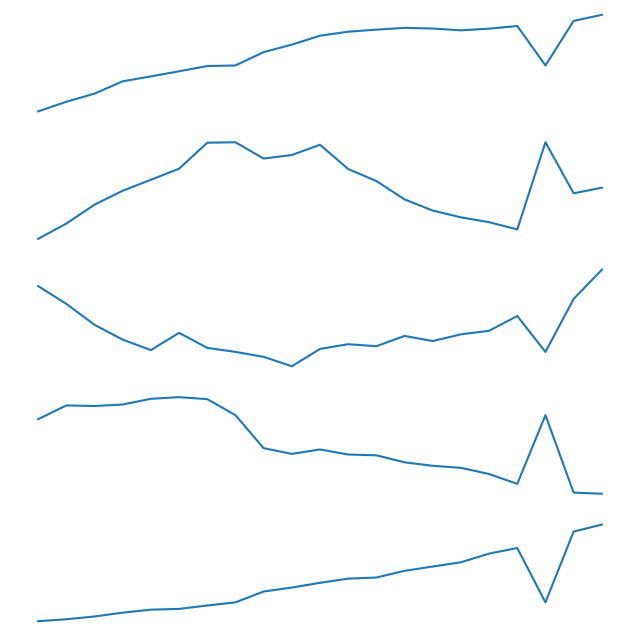

In [19]:
#plot just the centers here
fig, axs = plt.subplots(5, 1, figsize=(8,8))

for i,c in enumerate(km.cluster_centers_):
    axs[i].plot(c, color = 'tab:blue', alpha = 1.0) # plots the cluster center
    
    axs[i].set_axis_off()

    # plt.axis('off')

### **Figure 5:** 
The center of the clusters calculated from the k-means method. Five clusters are computed and shown above with no axes to emphasize the general overall behavior of the cluster centers, referred to as first, second, third, fourth, and fifth from the top for the rest of this figure caption. For all five of the clusters, a sharp peak either upwards or downwards is seen for later years. The first and fifth cluster have similar behavior of general growth before the peak, and then a sharp peak that goes downwards. However, the peak downwards for the fifth cluster seems to be larger compared to the peak downwards for the first cluster. The third cluster shows some similarity to the first and the fifth cluster as well in having a sharp downwards peak, however it shows a slow decay behavior before said peak. The second and fourth cluster have the same upwards peak behavior. However, the second cluster sees both a growth and decline before the peak, while the fourth cluster sees a general decrease with time before the peak. Considering the time range this data is looking at, the peak may correspond to the aftermath of the events of the early 2000's in New York/the USA in general. 

Then plot also the time series that belong to the cluster, overplotting them on the cluster center (cluster center in blue, alpha=1, time series in black, alpha=0.3). The time series in a cluster can be found as km.labe

In [20]:
# testing km.labels_

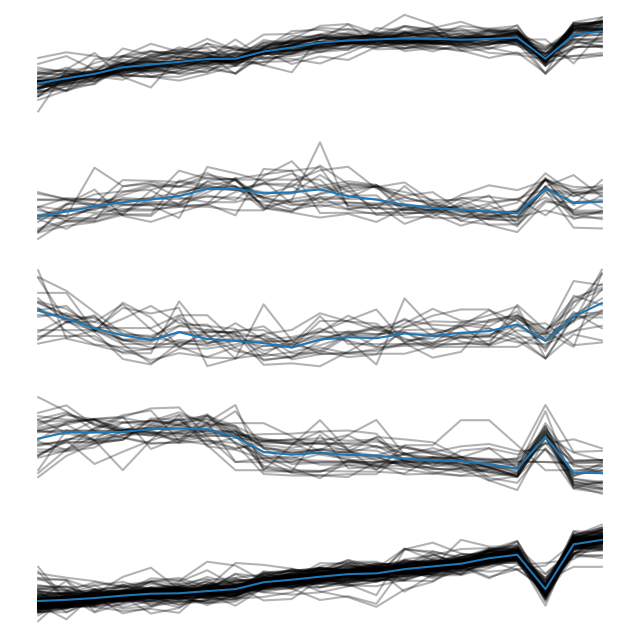

In [21]:
fig, axs = plt.subplots(5, 1, figsize=(8,8))

for i,c in enumerate(km.cluster_centers_):
    
    # Plot all data points in cluster i
    for sample in vals[km.labels_ == i]:
        axs[i].plot(sample, color='black', alpha=0.3)

    axs[i].plot(c, color = 'tab:blue', alpha = 1.0) # plots the cluster center
        
    axs[i].set_axis_off()

### **Figure 6:** 

The center of the clusters calculated from the k-means method, with the associated dataset with the cluster now plotted alongside the cluster center. The same peak and growth behavior of the cluster centers is seen here as in Figure 5. The cluster center also expectedly visually passes through the average of the associated datasets, seemingly. With the data plotted alongside the center cluster, we can see that the first and the fifth cluster have more datasets corresponding to them compared to the second, third, and fourth dataset. The datasets associated with the second, third, and fourth cluster also seems to have more general variation compared to the datasets associated with the first and the fifth dataset. If there are datasets that clearly belong to one cluster compared to the other, I visually cannot separate them. 

Map the zipcodes by color according to the cluster center - you can make a single map in 5 color or 5 maps in 1 color each


In [22]:
#create a dataframe with the cluster id per zipcode
clustersdf = pd.DataFrame()
clustersdf['ZIPCODE'] = df_imputed.index.astype(str)
clustersdf['cluster'] = km.labels_
clustersdf.head()

,ZIPCODE,cluster
0,11436,4
1,11213,4
2,11212,4
3,11225,4
4,11218,4


In [23]:
#merge it with the geodataframe with the zipcode shapes- I am losing 1 zipcode...
mergednyz = nyczipsshp.merge(clustersdf, on='ZIPCODE', how='inner')
print("length of dataframes:",
      len(mergednyz.ZIPCODE),
      len(np.unique(clustersdf.ZIPCODE)), len(np.unique(nyczipsshp.ZIPCODE)))

length of dataframes: 239 239 248


Note from Yuca: from earlier preprocessing, it seems like we are losing ~9 zipcodes here instead of one (that the professor loses in her homework setup)

/tmp/ipykernel_31/1159410810.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['' * len(ax.get_xticklabels())])


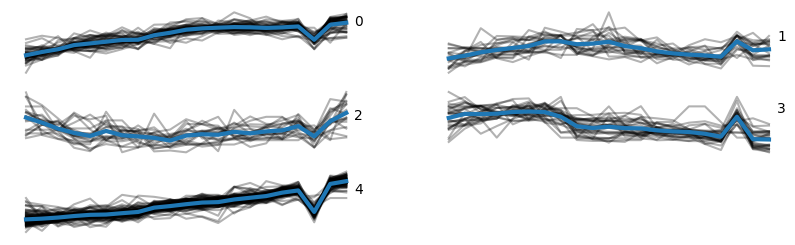

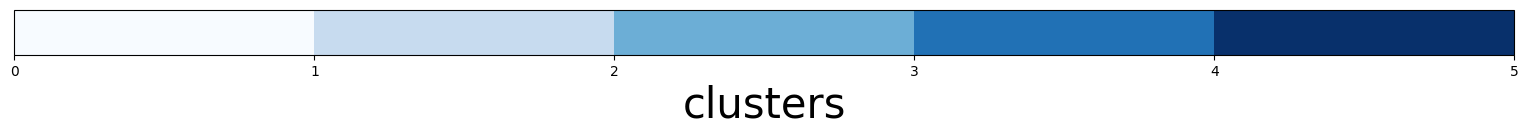

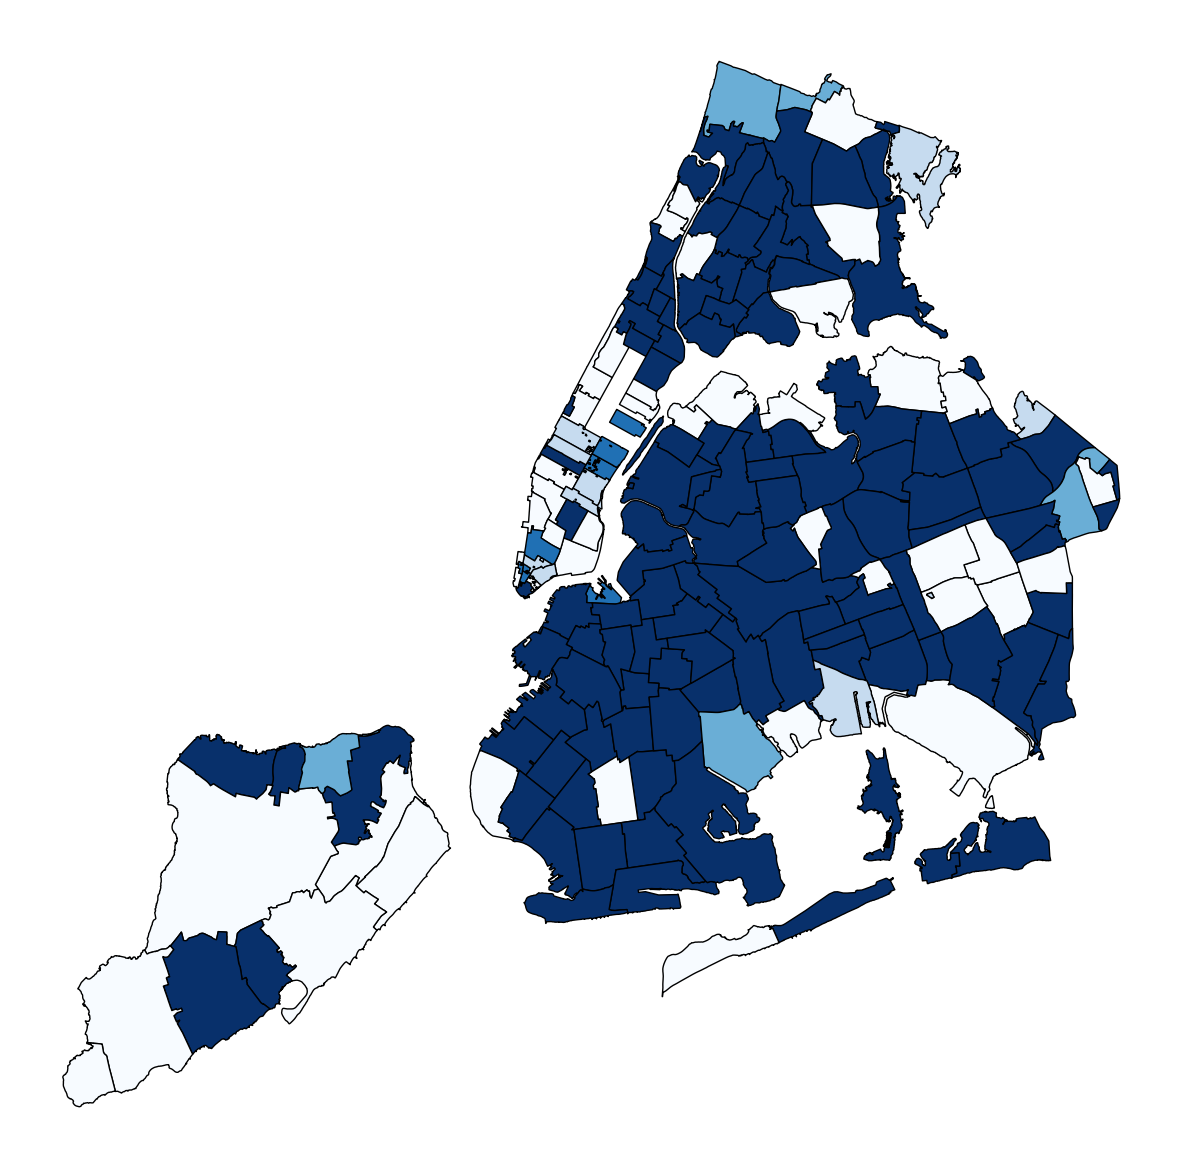

In [24]:
import matplotlib as mpl
fig = plt.figure(figsize=(10, 5))
for i, Xc in enumerate(km.cluster_centers_):
    ax = fig.add_subplot(5, 2, (i + 1))

    for v in vals[km.labels_ == i]:
        ax.plot(np.arange(1994, 2015, 1), v, 'k-', alpha=0.3)
    ax.text(2014.5, 1, "%d" % i)

    plt.xticks(fontsize=10)
    ax.set_yticklabels(['' * len(ax.get_xticklabels())])
    ax.plot(np.arange(1994, 2015, 1), Xc, lw=3)
    plt.grid(False)
    plt.axis('off')
fig = plt.figure(figsize=(15, 3))
ax1 = fig.add_axes([0.05, 1.0, 1, 0.15])
cmap = mpl.cm.Blues
norm = mpl.colors.Normalize(vmin=0, vmax=5)

#adding a color bar to identify the clusters on the map
# ColorbarBase derives from ScalarMappable and puts a colorbar
# in a specified axes, so it has everything needed for a
# standalone colorbar.
bounds = range(nc + 1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cb3 = mpl.colorbar.ColorbarBase(
    ax1,
    cmap=cmap,
    norm=norm,
    ticks=bounds,
    spacing='uniform',
    orientation='horizontal')
cb3.set_label('clusters', fontsize=30)
ax = plt.figure(figsize=(15, 15)).add_subplot(111)
mergednyz.plot(column='cluster', cmap='Blues', alpha=1, ax=ax, ec='k')
tmp = ax.axis('off')

### **Figure 7:**
Cloropleth of cluster centers for 5 k-means clusters of business patterns (number of businesses) at the zipcode level for NYC zipcodes: each color indicates a cluster. The business pattern time series are plotted at the top.

The borough of Queens is mainly seen to all be in one cluster, while some counties in Queens (notably ones near the coast or more inland on the right) are in another cluster together. The upper part of Manhattan is mostly in the same cluster as Queens as well (i.e. cluster 4). The lower part of Manhattan seems to have more varied cluster labels, where clusters 0-4 are all seen in that area. The counties in Staten Island either belong in cluster 0 or cluster 4, with only one county belonging in cluster 2. For the counties in cluster 1 and 2, it seems like business zipcodes have either had slower growth/decay over time (in general), which may be due to the fact that these counties are farther away from Lower Manhattan (i.e. the busiest area in NYC that has the most traffic). Queens and the Bronx are historically known to be poorer boroughs compared to Manhattan (except for a few places in Queens), so it seems like these two boroughs have had more similar business patterns throughout the years. Lower Manhattan being clustered differently from the other boroughs makes sense, as most of the business and foot traffic in NYC is concentrated in this area. From the commentary attached to Figure 5, the downwards peak in business especially in cluster 0 (mainly located in lower Manhattan) can be correlated to the events of the early 2000's, where businesses may have wanted to move away from the lower Manhattan area to other areas in NYC, which is also seen in the peak of other clusters. However, as time went on towards the end of our time series here, more businesses seemingly return to the lower Manhattan area as things recover (as we know from history). Staten Island, though it does see some changes, does not see as much variation in cluster center change compared to the other boroughs. 

create 8 kmeans models with 2-10 cluster centers. put each model in a list

(array([0, 1], dtype=int32), array([185,  54]))
(array([0, 1, 2], dtype=int32), array([ 19,  46, 174]))
(array([0, 1, 2, 3], dtype=int32), array([ 19,  32, 170,  18]))
(array([0, 1, 2, 3, 4], dtype=int32), array([ 50,  21,  19,  28, 121]))
(array([0, 1, 2, 3, 4, 5], dtype=int32), array([ 14,  18,  47,  23, 124,  13]))
(array([0, 1, 2, 3, 4, 5, 6], dtype=int32), array([121,  15,  50,   8,  15,  18,  12]))
(array([0, 1, 2, 3, 4, 5, 6, 7], dtype=int32), array([121,  17,  11,  11,  49,   9,   6,  15]))
(array([0, 1, 2, 3, 4, 5, 6, 7, 8], dtype=int32), array([73, 15, 19,  5, 15,  7, 79, 10, 16]))


/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/sklearn/cluster/_kmeans.py:8

Text(0, 0.5, 'Inertia')

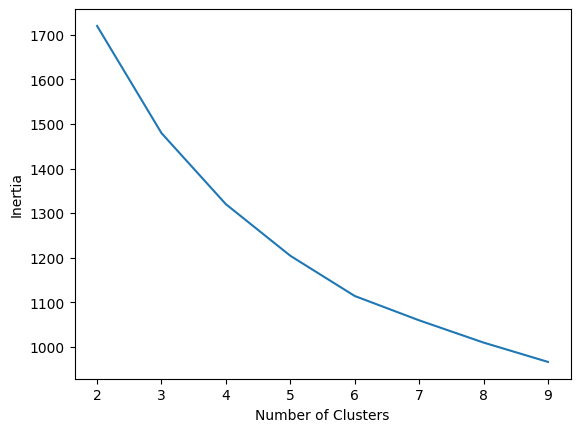

In [25]:
kms = []

for nc in range(2,10):
  #cluster with kmeans
  kms.append(KMeans(n_clusters=nc, random_state=302).fit(vals))


#each observation in the km object has a label:
#that is the cluster assigned to that observation
for km in kms:
  print(np.unique(km.labels_, return_counts=True))


import pylab as plt
# note from yuca: from documentation website, 
# "inertia (float): Sum of squared distances of samples to their closest cluster center, weighted by the sample weights if provided."
plt.plot(range(2,10), [km.inertia_ for km in kms])
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")

### **Figure 8:**
The inertia, the sum of squared distances to their closest cluster center, as a function of clusters. Inertia can act essentially as a proxy/measure of how accurate the clustering is: the smaller the distance, the more similar the cluster center to the data. We can see a gradual decay in the inertia as the number of clusters goes up, signaling higher accuracy as the number of clusters increase. From this figure, having 5 clusters seems to be at a decent point in this sample range of clusters: the inertia is lower than having 2 clusters by ~500, and going up to 9 clusters only decreases the inertia by ~200. However, it is overall not exceedingly clear from the data itself whether or not having a higher number of clusters can really tell us more information versus having a lower number of clusters, despite the change in inertia value. 

### or maybe like this, depending on which algorithm you use, and how you proceed to preprocess your data and how you cluster it. There is no one correct answer, but general trends should be retrieved.

# repeating the exercise using DBSCAN or hyerarchical agglomerative clustring...

In [26]:
# note from Yuca: trying DBSCAN, you do not specify the number of clusters you want for the way DBSCAN works 
# since DBSCAN "finds core samples of high density and expands clusters from them" (from their documentation online)
# documentation: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.DBSCAN.html

from sklearn.cluster import DBSCAN

"""
epsfloat, default=0.5
The maximum distance between two samples for one to be considered as in the neighborhood of the other. 
This is not a maximum bound on the distances of points within a cluster. 
This is the most important DBSCAN parameter to choose appropriately for your data set and distance function.

min_samplesint, default=5
The number of samples (or total weight) in a neighborhood for a point to be considered as a core point. This includes the point itself. 
If min_samples is set to a higher value, DBSCAN will find denser clusters, whereas if it is set to a lower value, the found clusters will be more sparse.
"""


db = DBSCAN(eps=3.5, min_samples=2).fit(vals) 

For eps = 3.5 and min_samples = 2:

In [27]:
db.core_sample_indices_.shape

(221,)

In [28]:
print(db.core_sample_indices_)

[  0   1   2   3   4   5   6   7   8   9  10  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72  73
  74  75  77  78  79  80  81  82  83  84  85  86  87  88  89  90  91  94
  95  96  97  98  99 100 102 103 104 105 106 107 108 109 110 111 112 113
 114 115 116 117 118 119 120 121 122 123 124 125 126 127 128 129 130 131
 132 133 134 135 136 137 138 139 140 141 142 143 144 145 146 147 148 149
 150 151 152 153 154 155 156 157 158 159 160 161 162 163 164 165 166 167
 168 169 170 171 172 173 174 175 176 177 178 179 180 181 182 183 184 185
 186 187 189 192 193 194 195 196 198 199 200 201 202 203 204 205 206 207
 208 209 210 211 212 213 214 215 216 218 219 224 226 227 228 229 230 231
 232 233 234 236 238]


In [29]:
db.components_.shape

(221, 21)

In [30]:
db.labels_.shape

(239,)

In [31]:
db.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0, -1,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0, -1, -1,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0, -1,
       -1, -1, -1,  0, -1

[ 0 -1]


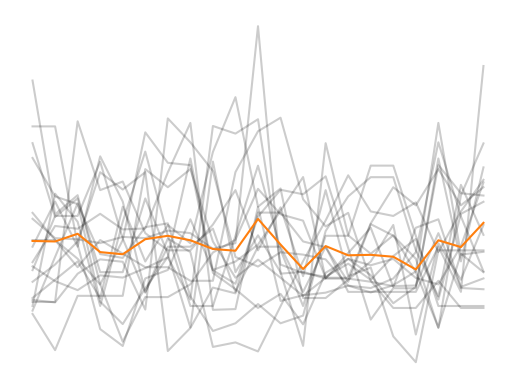

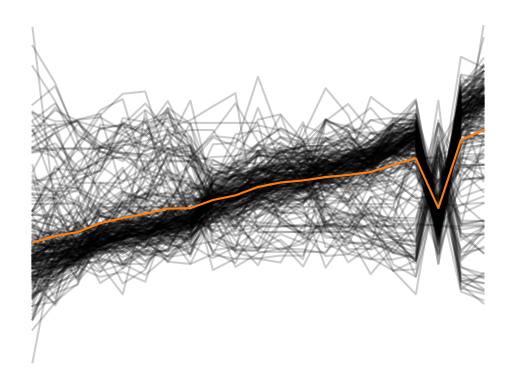

In [32]:
# Get cluster labels
labels = db.labels_

# Add cluster labels to the DataFrame
vals_pd = pd.DataFrame(vals)
vals_pd['cluster'] = labels
print(vals_pd['cluster'].unique())

# Now you can analyze the clusters as you did with KMeans
# For example:
# Visualize clusters
# ax = vals_pd[vals_pd.cluster == -1].drop("cluster", axis=1).T.plot(legend=False, color="k", alpha=0.2)
for l in range(-1, vals_pd['cluster'].max()+1):
    if len(vals_pd[vals_pd.cluster == l]) == 0:
        continue
    
    vals_pd[vals_pd.cluster == l].drop("cluster", axis=1).T.plot(legend=False, color='black', alpha=0.2)

    cluster_data = vals_pd[vals_pd.cluster == l].drop("cluster", axis=1)
    cluster_center = cluster_data.mean(axis=0)
    plt.plot(cluster_center.values, color='tab:orange', alpha=1.0)
    plt.axis('off')
    plt.show()
    
    # cluster_center = vals_pd[vals_pd.cluster == l].mean(axis=0)  # Calculate the "center" of the cluster
    # axs[i].plot(cluster_center, color='tab:orange', alpha=1.0)  # Plot the cluster "center"

In [33]:
#create a dataframe with the cluster id per zipcode
clustersdf = pd.DataFrame()
clustersdf['ZIPCODE'] = df_imputed.index.astype(str)
clustersdf['cluster'] = db.labels_
clustersdf.head()

,ZIPCODE,cluster
0,11436,0
1,11213,0
2,11212,0
3,11225,0
4,11218,0


In [34]:
#merge it with the geodataframe with the zipcode shapes- I am losing 1 zipcode...
mergednyz = nyczipsshp.merge(clustersdf, on='ZIPCODE', how='inner')
print("length of dataframes:",
      len(mergednyz.ZIPCODE),
      len(np.unique(clustersdf.ZIPCODE)), len(np.unique(nyczipsshp.ZIPCODE)))

length of dataframes: 239 239 248


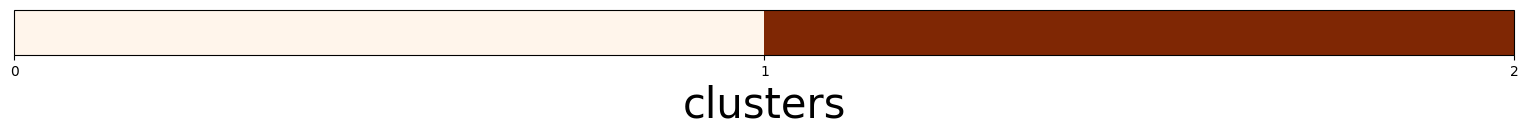

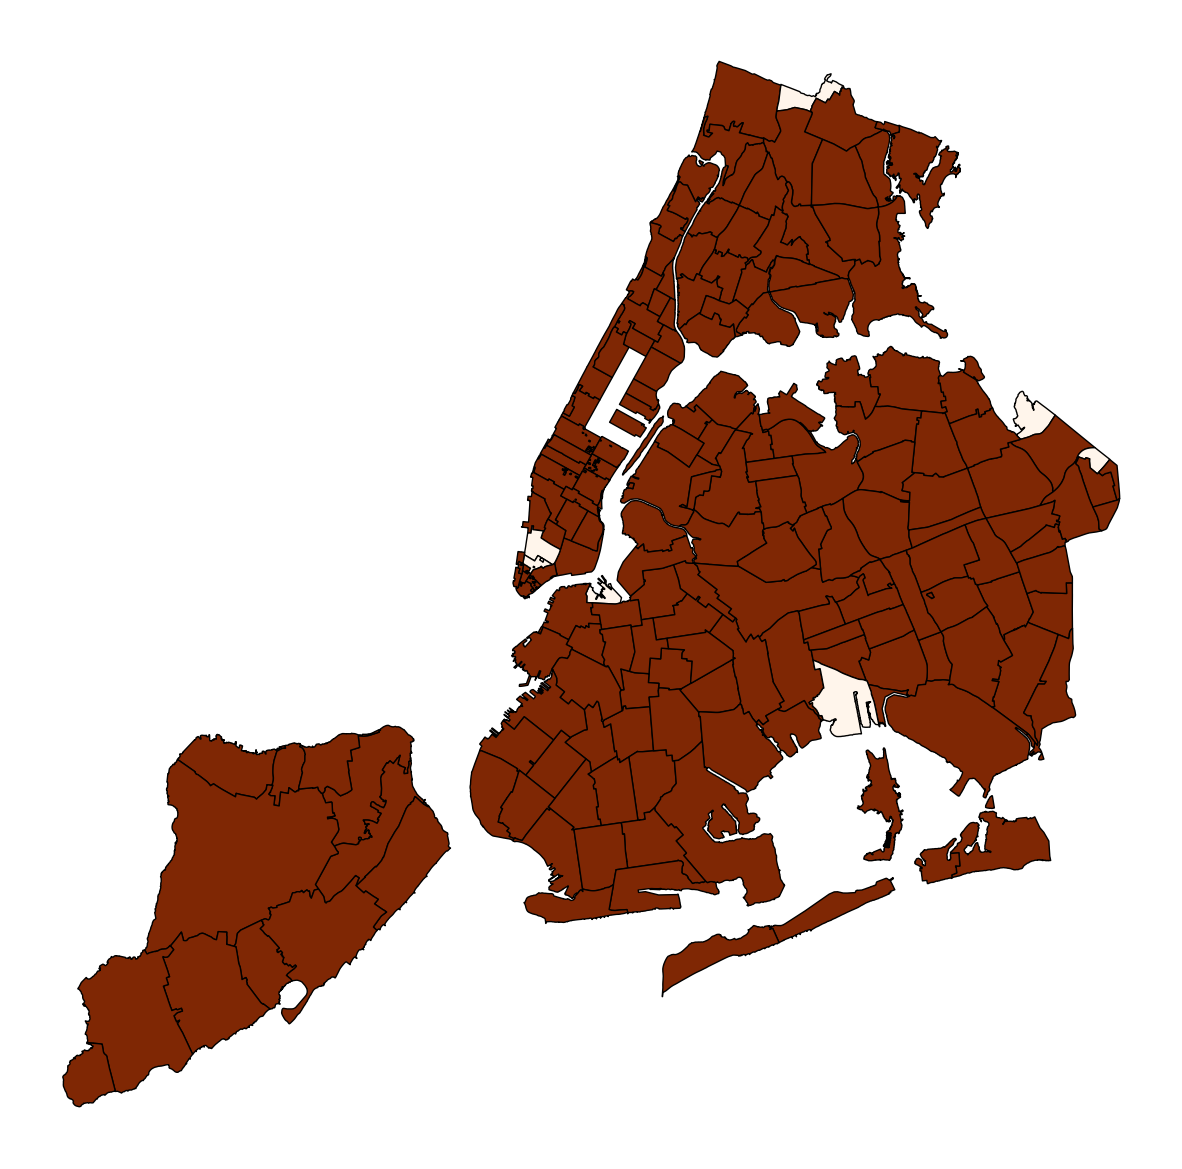

In [35]:
# import matplotlib as mpl
# fig = plt.figure(figsize=(10, 5))
# for i, Xc in enumerate(km.cluster_centers_):
#     ax = fig.add_subplot(5, 2, (i + 1))

#     for v in vals[km.labels_ == i]:
#         ax.plot(np.arange(1994, 2015, 1), v, 'k-', alpha=0.3)
#     ax.text(2014.5, 1, "%d" % i)

#     plt.xticks(fontsize=10)
#     ax.set_yticklabels(['' * len(ax.get_xticklabels())])
#     ax.plot(np.arange(1994, 2015, 1), Xc, lw=3)
#     plt.grid(False)
#     plt.axis('off')
fig = plt.figure(figsize=(15, 3))
ax1 = fig.add_axes([0.05, 1.0, 1, 0.15])
cmap = mpl.cm.Oranges
norm = mpl.colors.Normalize(vmin=0, vmax=5)

#adding a color bar to identify the clusters on the map
# ColorbarBase derives from ScalarMappable and puts a colorbar
# in a specified axes, so it has everything needed for a
# standalone colorbar.
bounds = range(2 + 1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cb3 = mpl.colorbar.ColorbarBase(
    ax1,
    cmap=cmap,
    norm=norm,
    ticks=bounds,
    spacing='uniform',
    orientation='horizontal')
cb3.set_label('clusters', fontsize=30)
ax = plt.figure(figsize=(15, 15)).add_subplot(111)
mergednyz.plot(column='cluster', cmap='Oranges', alpha=1, ax=ax, ec='k')
tmp = ax.axis('off')

For eps = 2.5 and min_samples = 2:

[ 0 -1  1  2]


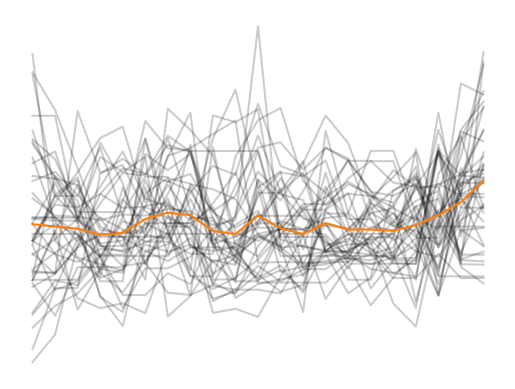

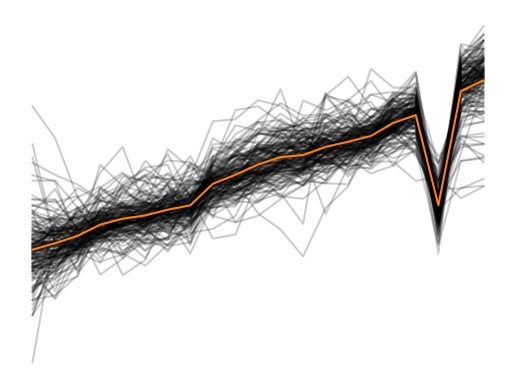

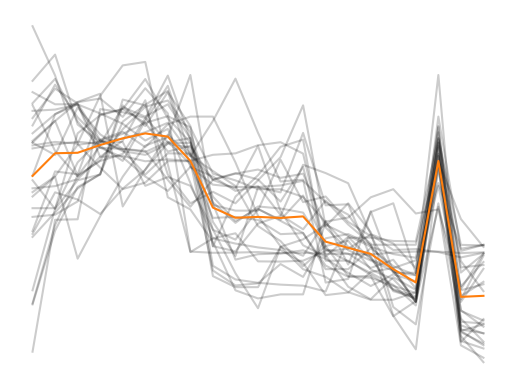

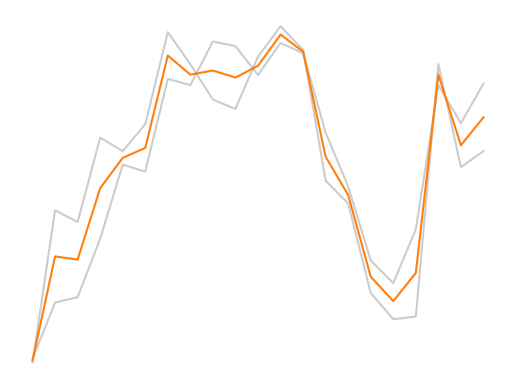

In [41]:
db = DBSCAN(eps=2.5, min_samples=2).fit(vals) 

# Get cluster labels
labels = db.labels_

# Add cluster labels to the DataFrame
vals_pd = pd.DataFrame(vals)
vals_pd['cluster'] = labels
print(vals_pd['cluster'].unique())

# Now you can analyze the clusters as you did with KMeans
# For example:
# Visualize clusters
# ax = vals_pd[vals_pd.cluster == -1].drop("cluster", axis=1).T.plot(legend=False, color="k", alpha=0.2)
for l in range(-1, vals_pd['cluster'].max()+1):
    if len(vals_pd[vals_pd.cluster == l]) == 0:
        continue
    
    vals_pd[vals_pd.cluster == l].drop("cluster", axis=1).T.plot(legend=False, color='black', alpha=0.2)

    cluster_data = vals_pd[vals_pd.cluster == l].drop("cluster", axis=1)
    cluster_center = cluster_data.mean(axis=0)
    plt.plot(cluster_center.values, color='tab:orange', alpha=1.0)
    plt.axis('off')
    plt.show()
    
    # cluster_center = vals_pd[vals_pd.cluster == l].mean(axis=0)  # Calculate the "center" of the cluster
    # axs[i].plot(cluster_center, color='tab:orange', alpha=1.0)  # Plot the cluster "center"

length of dataframes: 239 239 248


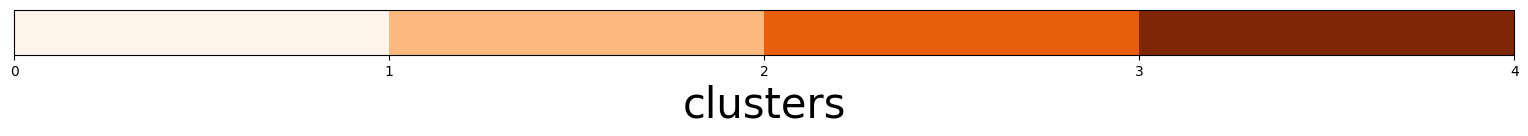

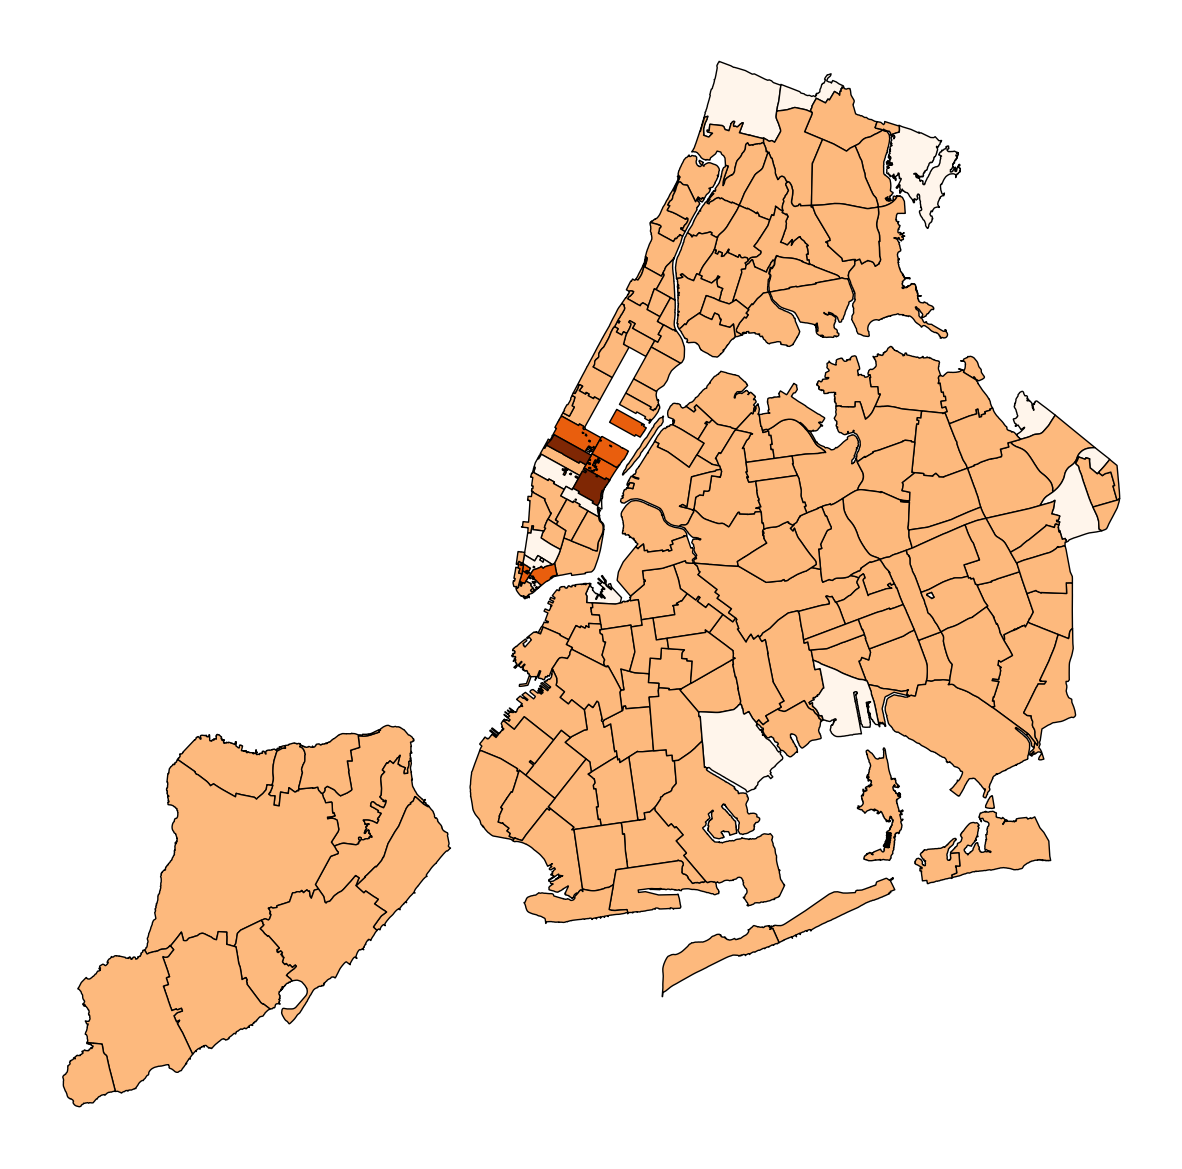

In [42]:
clustersdf['cluster'] = db.labels_

#merge it with the geodataframe with the zipcode shapes- I am losing 1 zipcode...
mergednyz = nyczipsshp.merge(clustersdf, on='ZIPCODE', how='inner')
print("length of dataframes:",
      len(mergednyz.ZIPCODE),
      len(np.unique(clustersdf.ZIPCODE)), len(np.unique(nyczipsshp.ZIPCODE)))

fig = plt.figure(figsize=(15, 3))
ax1 = fig.add_axes([0.05, 1.0, 1, 0.15])
cmap = mpl.cm.Oranges
norm = mpl.colors.Normalize(vmin=0, vmax=5)

bounds = range(4 + 1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cb3 = mpl.colorbar.ColorbarBase(
    ax1,
    cmap=cmap,
    norm=norm,
    ticks=bounds,
    spacing='uniform',
    orientation='horizontal')
cb3.set_label('clusters', fontsize=30)
ax = plt.figure(figsize=(15, 15)).add_subplot(111)
mergednyz.plot(column='cluster', cmap='Oranges', alpha=1, ax=ax, ec='k')
tmp = ax.axis('off')

For eps = 3.5 and min_samples = 1:

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18]


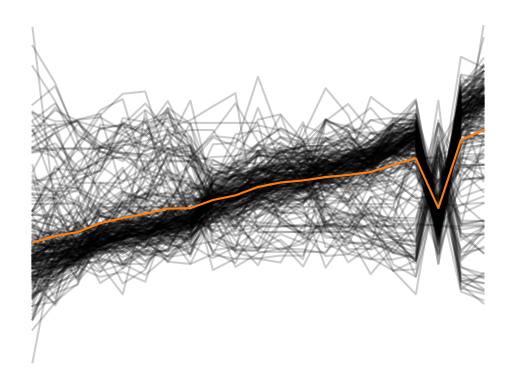

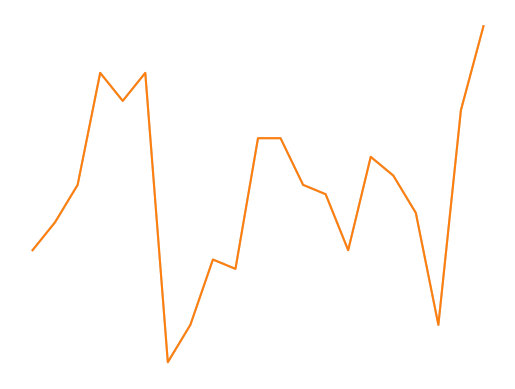

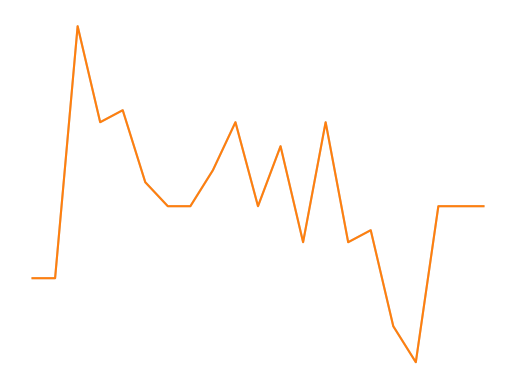

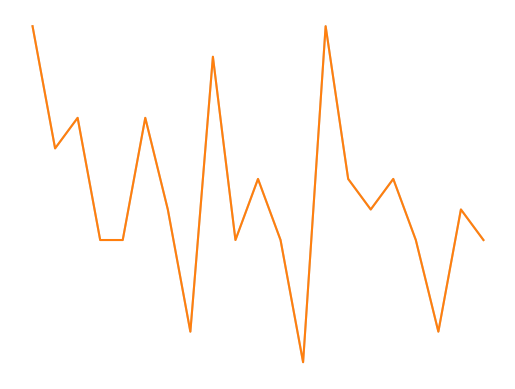

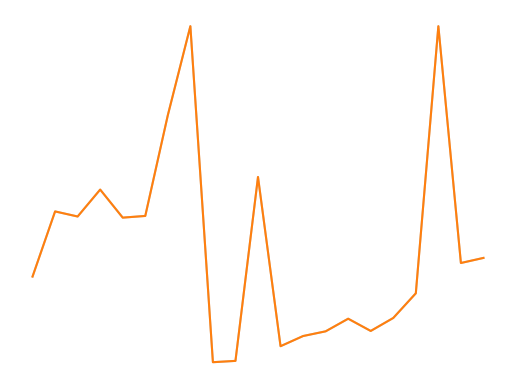

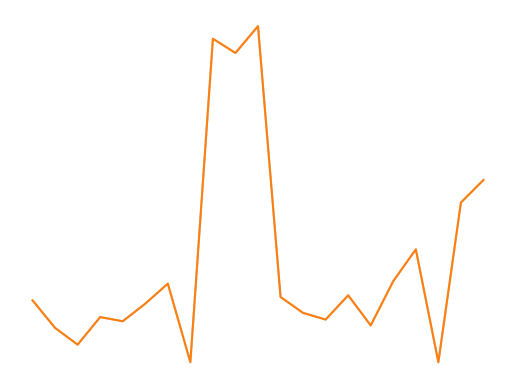

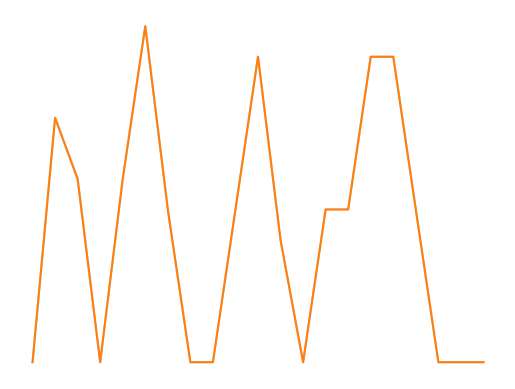

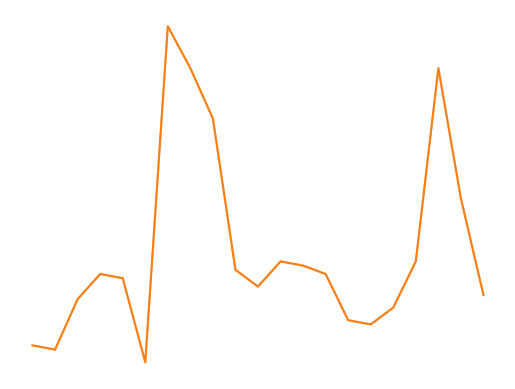

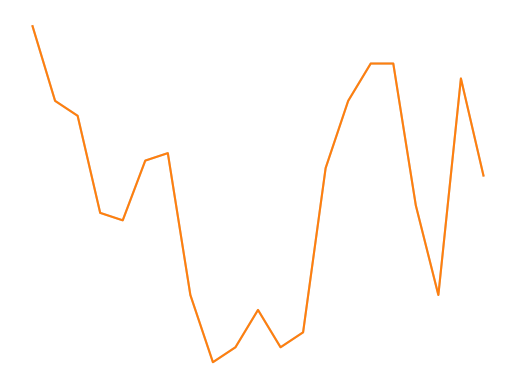

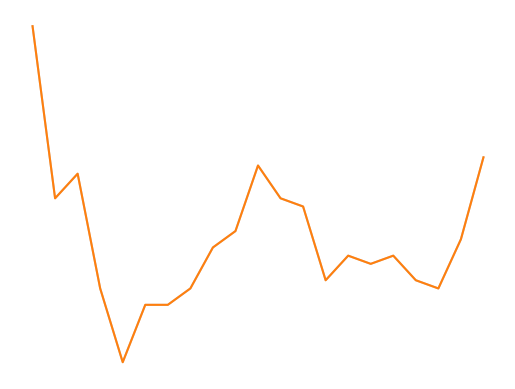

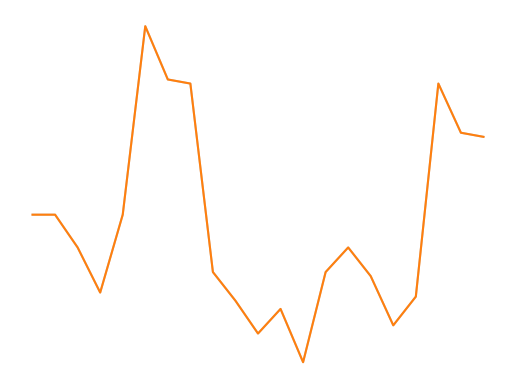

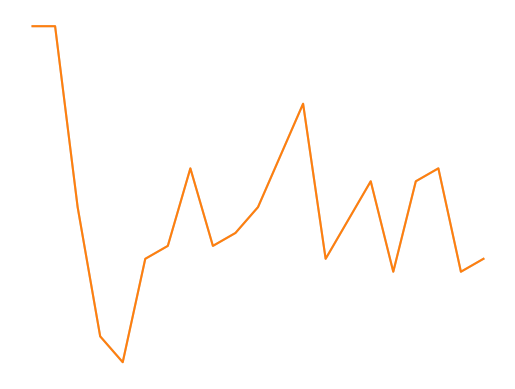

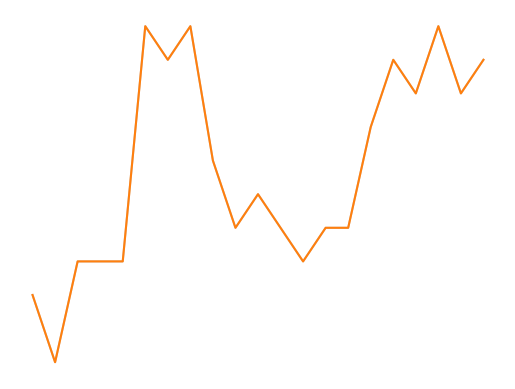

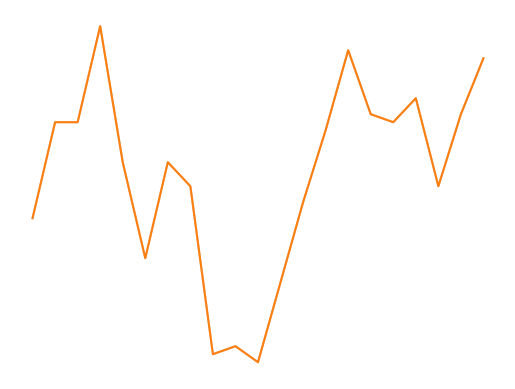

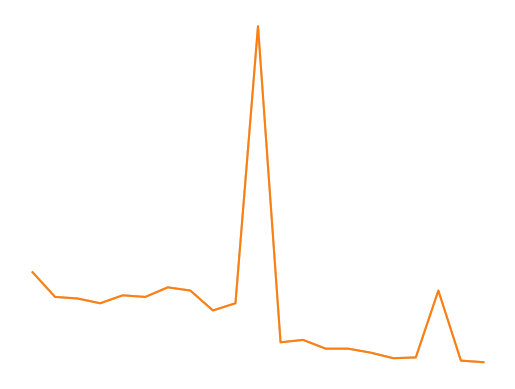

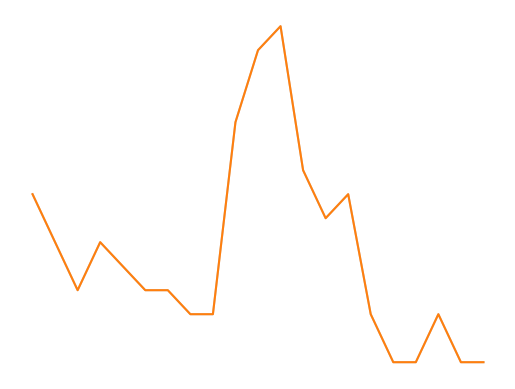

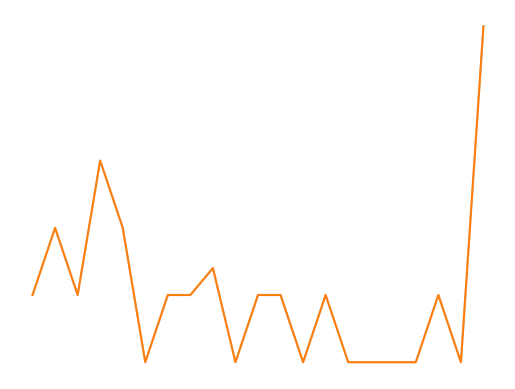

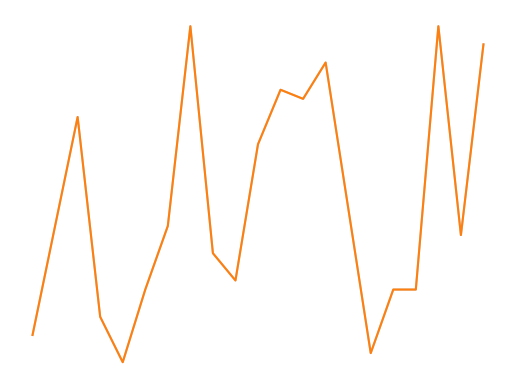

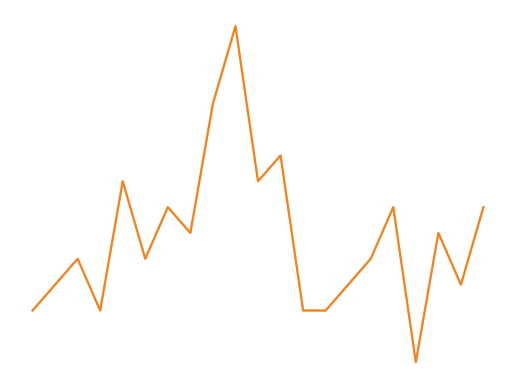

In [43]:
db = DBSCAN(eps=3.5, min_samples=1).fit(vals) 

# Get cluster labels
labels = db.labels_

# Add cluster labels to the DataFrame
vals_pd = pd.DataFrame(vals)
vals_pd['cluster'] = labels
print(vals_pd['cluster'].unique())

# Now you can analyze the clusters as you did with KMeans
# For example:
# Visualize clusters
# ax = vals_pd[vals_pd.cluster == -1].drop("cluster", axis=1).T.plot(legend=False, color="k", alpha=0.2)
for l in range(-1, vals_pd['cluster'].max()+1):
    if len(vals_pd[vals_pd.cluster == l]) == 0:
        continue
    
    vals_pd[vals_pd.cluster == l].drop("cluster", axis=1).T.plot(legend=False, color='black', alpha=0.2)

    cluster_data = vals_pd[vals_pd.cluster == l].drop("cluster", axis=1)
    cluster_center = cluster_data.mean(axis=0)
    plt.plot(cluster_center.values, color='tab:orange', alpha=1.0)
    plt.axis('off')
    plt.show()
    
    # cluster_center = vals_pd[vals_pd.cluster == l].mean(axis=0)  # Calculate the "center" of the cluster
    # axs[i].plot(cluster_center, color='tab:orange', alpha=1.0)  # Plot the cluster "center"

length of dataframes: 239 239 248


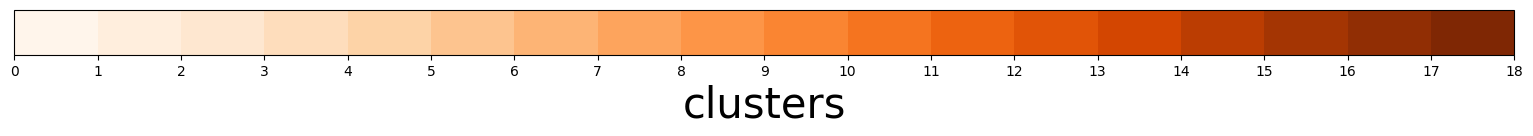

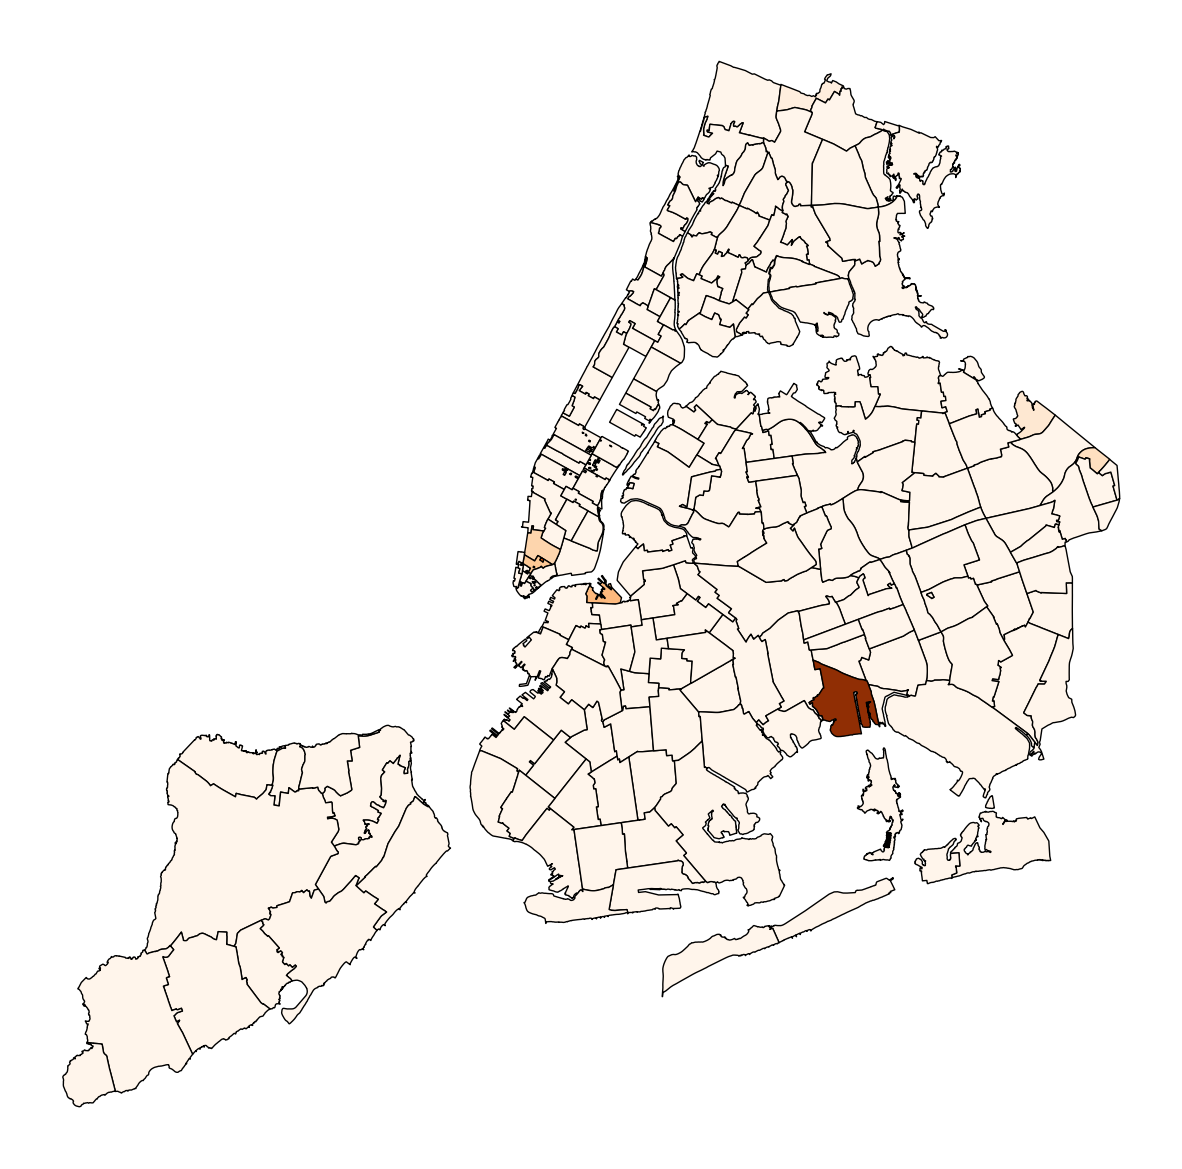

In [44]:
clustersdf['cluster'] = db.labels_

#merge it with the geodataframe with the zipcode shapes- I am losing 1 zipcode...
mergednyz = nyczipsshp.merge(clustersdf, on='ZIPCODE', how='inner')
print("length of dataframes:",
      len(mergednyz.ZIPCODE),
      len(np.unique(clustersdf.ZIPCODE)), len(np.unique(nyczipsshp.ZIPCODE)))

fig = plt.figure(figsize=(15, 3))
ax1 = fig.add_axes([0.05, 1.0, 1, 0.15])
cmap = mpl.cm.Oranges
norm = mpl.colors.Normalize(vmin=0, vmax=5)

bounds = range(18 + 1)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)
cb3 = mpl.colorbar.ColorbarBase(
    ax1,
    cmap=cmap,
    norm=norm,
    ticks=bounds,
    spacing='uniform',
    orientation='horizontal')
cb3.set_label('clusters', fontsize=30)
ax = plt.figure(figsize=(15, 15)).add_subplot(111)
mergednyz.plot(column='cluster', cmap='Oranges', alpha=1, ax=ax, ec='k')
tmp = ax.axis('off')

#### **Figure 9**: (covers all plots related to DBSCAN)

The cluster centers and its associated data with the cluster, along with the cloropleth of cluster centers for eps = 3.5 and min_samples = 2, eps = 2.5 and min_samples = 2, and eps = 3.5 and min_samples = 1 for the top, middle, and bottom set of graphs, respectively. Note first the extreme sensitivity of DBSCAN to the inputted hyperparameters: the top set of hyperparameters results in only two clusters (with one of them being clustered as just noise while everything else gets put into another cluster), the middle set of hyperparameters results in three clusters and one cluster of noise, while the bottom set of hyperparameters results in 18 different clusters along with a cluster of noise. Each set of hyperparameters have their caveats as well: from the cluster center graphs of the to hyperparameters, it is visually clear that the down-peak and up-peak data are not separated from each other. On the contrary, some datasets from the bottom set of hyperparameters are too singled out from each other (ex. some datasets are in entirely in their own cluster) while still not being able to distinguish the general down-peak and up-peak datasets from the main cluster. From this, it was difficult to quickly find a suitable set of hyperparameters to describe the data well. From the cloropleth graph, it is clear that the top set of hyperparameters does not tell us much from the clustering. The bottom cloropleth graph is able to pick up on some of the clusters in the lower Manhattan area, however it does not yet show much distinction in between the different counties in lower Manhattan. The middle cloropleth graph is visually able to perform the best, especially in comparison to the k-means method, where the counties in lower Manhattan are picked up on and distinguished between each other better compared to the other two DBSCAN cloropleth graphs. Additional tuning of hyperparameters could come from additional testing or additional knowledge that we could get about the dataset on hand. 

# If you want to use agglomerative clustering

In [40]:
....

SyntaxError: invalid syntax (1805539695.py, line 1)

### And if you use hierarchical clustering in scipy you can make a dandrogram it may look like this:

In [ ]:
import scipy.cluster as scp
fig = pl.figure(figsize=(20,10), dpi=150)
pl.ylabel("distance")
ddg = scp.hierarchy.dendrogram(scp.hierarchy.linkage(vals, method='ward'),
                               labels = zipcodes,
                               leaf_rotation=90.,  # rotates the x axis labels
                               leaf_font_size=8.)  # font size for the x axis labels)


In [ ]:
!pwd